# Final Project: HR Analytics – Productivity Prediction of Garment Employees

### Introduction

Human Resources (HR) analytics plays a vital role in optimizing workforce performance, identifying efficiency gaps, and improving organizational outcomes. In the labor-intensive garment manufacturing sector, productivity directly impacts profitability, worker well-being, and sustainable growth. Managers must balance workforce size, absenteeism, overtime, and incentive structures while ensuring targets are achieved consistently.

This project focuses on analyzing the **Productivity Prediction of Garment Employees dataset**, obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees). The dataset consists of **1,197 records** and **15 features**, including both categorical variables (department, quarter, day) and numerical variables (targeted productivity, actual productivity, work-in-progress, overtime, idle time, incentives, number of workers, etc.). It captures daily productivity information of garment factory workers, making it a rich source for **HR analytics**.

The objective of this project is to perform **end-to-end exploratory data analysis (EDA)** and derive actionable insights that can guide HR managers and decision-makers in the following ways:

- Understand how actual productivity compares with targeted productivity across departments, days, and quarters.  
- Identify workforce patterns, including the effect of absenteeism, idle time, and overtime on employee output.  
- Examine the role of incentives in motivating workers and boosting overall efficiency.  
- Analyze how team size and workload (WIP) affect productivity levels.  
- Explore time-based trends (month, year, weekday) to detect recurring patterns in performance.  

By combining statistical summaries, data visualizations, and HR-focused interpretations, this project aims to answer one central question:

**“What factors influence worker productivity in the garment industry, and how can HR managers leverage these insights to enhance efficiency and workforce planning?”**

The outcomes of this analysis will provide valuable inputs for **workforce scheduling, performance management, and employee well-being initiatives**, aligning with modern HR practices where data-driven decisions improve both productivity and employee satisfaction.

# Data Dictionary – Garments Worker Productivity Dataset

| Column Name           | Description                                                                 | Data Type      |
|-----------------------|-----------------------------------------------------------------------------|----------------|
| date                  | Date of record (dd-mm-yyyy format)                                          | datetime       |
| quarter               | Quarter of the year (Q1, Q2, Q3, Q4) as given in dataset                   | categorical    |
| department            | Department name (sewing, finishing)                                        | categorical    |
| day                   | Day of the week (Monday–Saturday)                                          | categorical    |
| team                  | Team number assigned to workers                                            | integer        |
| targeted_productivity | Planned productivity target set by management (0–1 scale)                  | float          |
| smv                   | Standard Minute Value – allocated time standard for a task                 | float          |
| wip                   | Work in Progress (unfinished work carried over)                            | float          |
| over_time             | Overtime work in minutes                                                   | integer        |
| incentive             | Financial or non-financial incentives offered to employees                 | integer        |
| idle_time             | Time (in minutes) when no productive work was done                         | float          |
| idle_men              | Number of workers idle during that time                                    | integer        |
| no_of_style_change    | Number of changes in garment style/design for that day                     | integer        |
| no_of_workers         | Number of workers present on that day                                      | float          |
| actual_productivity   | Actual productivity achieved (0–1 scale)                                   | float          |
| year                  | Extracted year from date                                                   | integer        |
| month                 | Extracted month from date (1–12)                                           | integer        |
| day_of_week           | Day of week (e.g., Monday, Tuesday) derived from date                      | categorical    |
| quarter_num           | Quarter number derived from date (1–4)                                     | integer        |
| quarter_label         | Quarter label (Q1: Jan–Mar, Q2: Apr–Jun, etc.)                             | categorical    |
| season                | Season derived from month (Winter, Spring, Summer, Autumn)                 | categorical    |


In [2]:
from google.colab import files
uploaded = files.upload()  # choose garments_worker_productivity.csv

Saving garments_worker_productivity.xlsx to garments_worker_productivity.xlsx


In [3]:
import pandas as pd

# Load the uploaded Excel file
df = pd.read_excel("garments_worker_productivity.xlsx")

# Show shape and first few rows
print("Shape (rows, columns):", df.shape)
df.head()

Shape (rows, columns): (1197, 15)


,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

Missing values per column:
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

Number of duplicate rows: 0


In [7]:
import pandas as pd

# 1) Ensure 'date' is datetime
df = df.copy()
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# 2) Add derived features (only if missing)
if 'year' not in df.columns:
    df['year'] = df['date'].dt.year
if 'month' not in df.columns:
    df['month'] = df['date'].dt.month
if 'day_of_week' not in df.columns:
    df['day_of_week'] = df['date'].dt.day_name()

# Quarter
if 'quarter_num' not in df.columns:
    df['quarter_num'] = df['date'].dt.quarter
if 'quarter_label' not in df.columns:
    df['quarter_label'] = df['quarter_num'].map({
        1: "Q1 (Jan–Mar)",
        2: "Q2 (Apr–Jun)",
        3: "Q3 (Jul–Sep)",
        4: "Q4 (Oct–Dec)"
    })

# Season
def _season_from_month(m):
    if pd.isna(m): return None
    m = int(m)
    if m in (12, 1, 2):  return "Winter"
    if m in (3, 4, 5):   return "Spring"
    if m in (6, 7, 8):   return "Summer"
    return "Autumn"

if 'season' not in df.columns:
    df['season'] = df['month'].apply(_season_from_month)

# 3) Quick confirmation
print(df[['date','year','month','day_of_week','quarter_label','season']].head())

        date  year  month day_of_week quarter_label  season
0 2015-01-01  2015      1    Thursday  Q1 (Jan–Mar)  Winter
1 2015-01-01  2015      1    Thursday  Q1 (Jan–Mar)  Winter
2 2015-01-01  2015      1    Thursday  Q1 (Jan–Mar)  Winter
3 2015-01-01  2015      1    Thursday  Q1 (Jan–Mar)  Winter
4 2015-01-01  2015      1    Thursday  Q1 (Jan–Mar)  Winter


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Helper to check a column before plotting
def has(col):
    return (col in df.columns) and (df[col].notna().any())

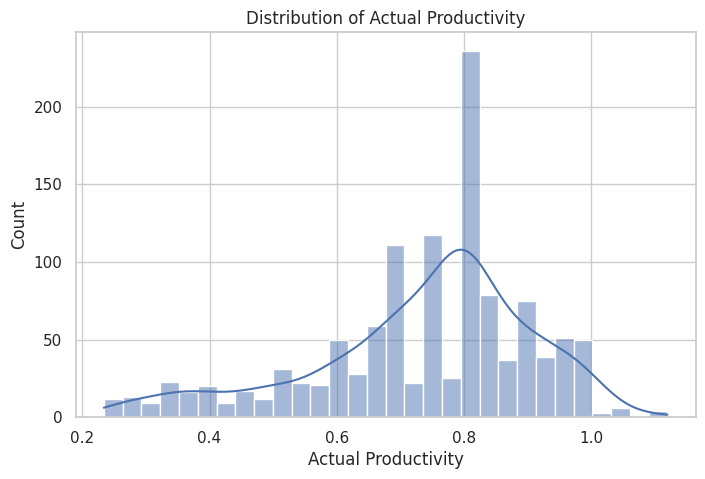

In [9]:
# 1) Distribution of Actual Productivity
if has('actual_productivity'):
    plt.figure(figsize=(8,5))
    sns.histplot(df['actual_productivity'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Actual Productivity")
    plt.xlabel("Actual Productivity")
    plt.ylabel("Count")
    plt.show()

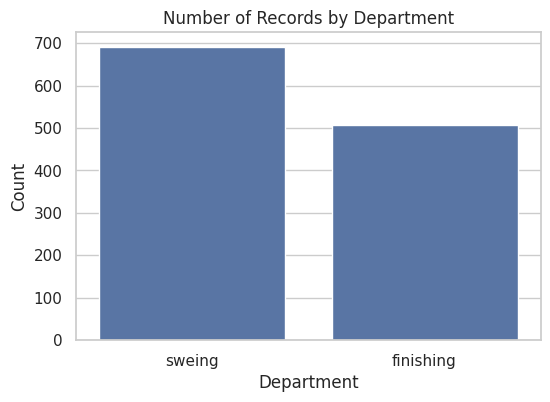

In [10]:
# 2) Count by Department
if has('department'):
    plt.figure(figsize=(6,4))
    sns.countplot(data=df[df['department'].notna()], x='department')
    plt.title("Number of Records by Department")
    plt.xlabel("Department")
    plt.ylabel("Count")
    plt.show()

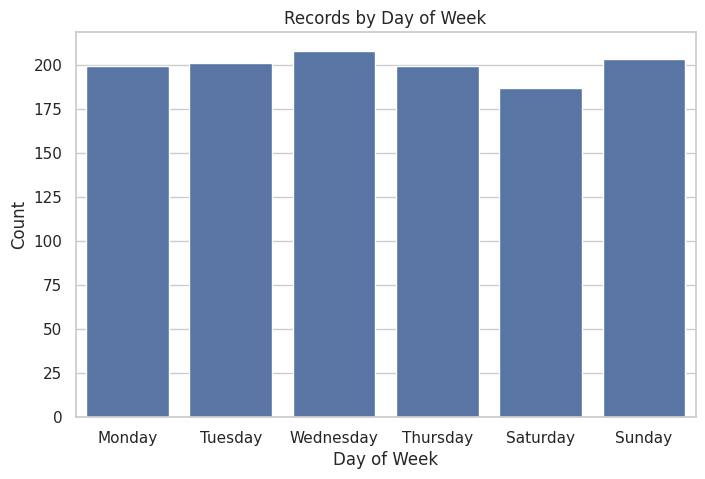

In [11]:
# 3) Count by Day of Week (ordered)
if has('day_of_week'):
    order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    plt.figure(figsize=(8,5))
    sns.countplot(data=df[df['day_of_week'].notna()], x='day_of_week',
                  order=[d for d in order if d in df['day_of_week'].unique()])
    plt.title("Records by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Count")
    plt.show()

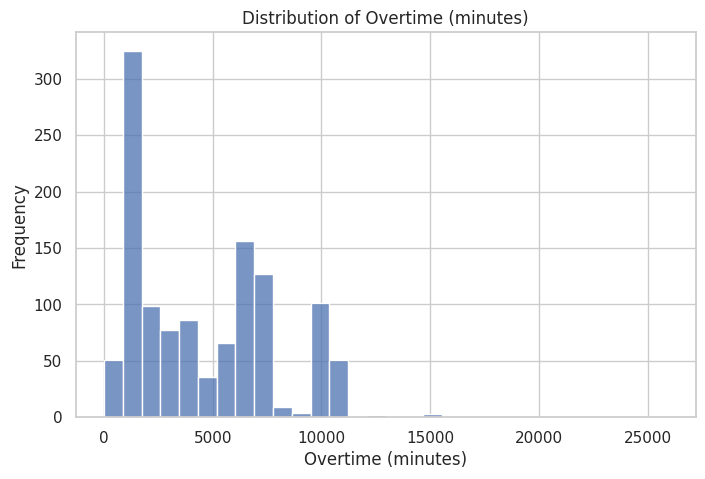

In [12]:
# 4) Distribution of Overtime (minutes)
if has('over_time'):
    plt.figure(figsize=(8,5))
    sns.histplot(df['over_time'].dropna(), bins=30)
    plt.title("Distribution of Overtime (minutes)")
    plt.xlabel("Overtime (minutes)")
    plt.ylabel("Frequency")
    plt.show()

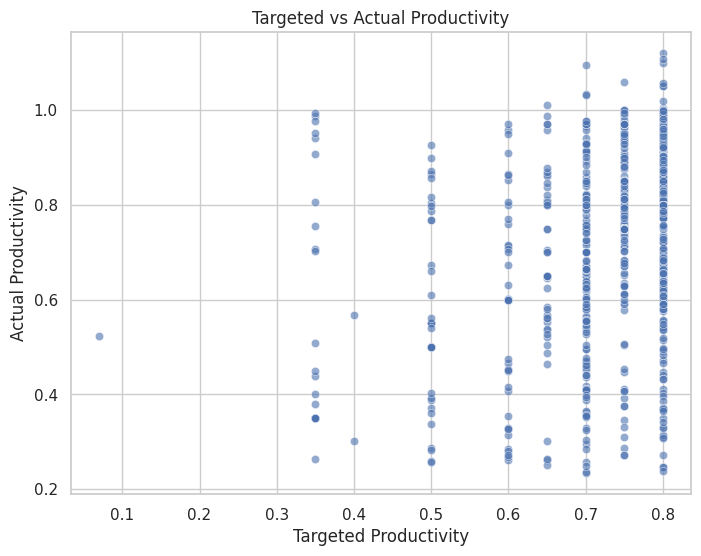

In [13]:
# 5) Targeted vs Actual Productivity (scatterplot)
if has('targeted_productivity') and has('actual_productivity'):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='targeted_productivity', y='actual_productivity', alpha=0.6)
    plt.title("Targeted vs Actual Productivity")
    plt.xlabel("Targeted Productivity")
    plt.ylabel("Actual Productivity")
    plt.show()

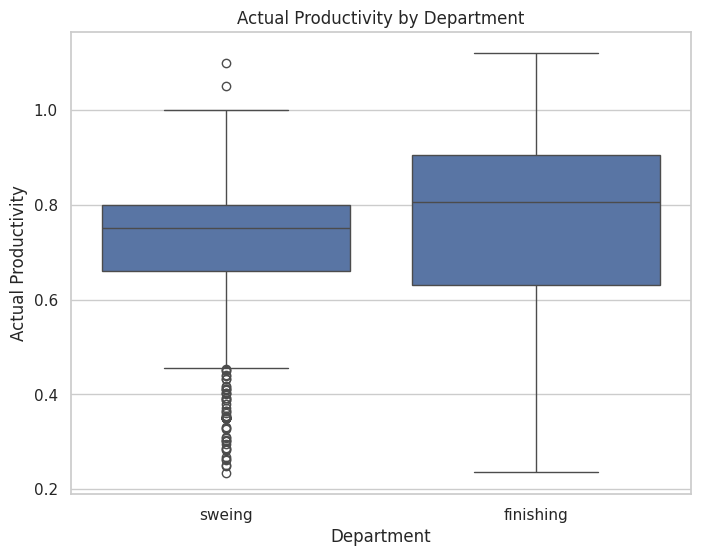

In [14]:
# 6) Department vs Actual Productivity (boxplot)
if has('department') and has('actual_productivity'):
    plt.figure(figsize=(8,6))
    sns.boxplot(data=df, x='department', y='actual_productivity')
    plt.title("Actual Productivity by Department")
    plt.xlabel("Department")
    plt.ylabel("Actual Productivity")
    plt.show()

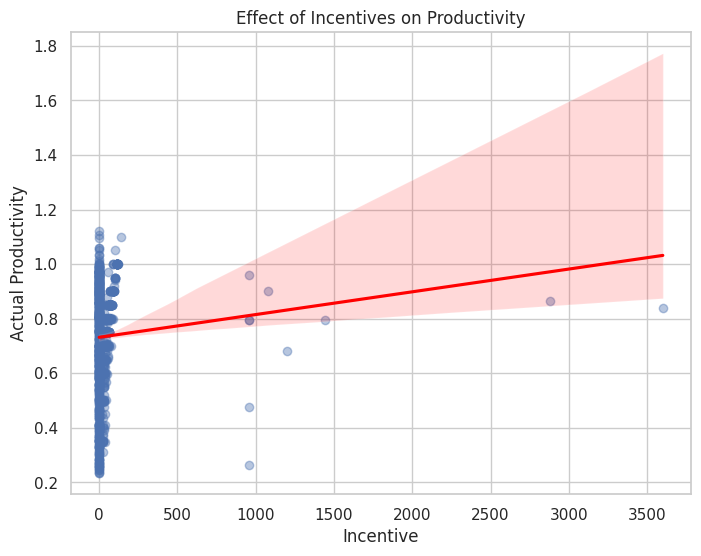

In [15]:
# 7) Incentives vs Actual Productivity (scatter + regression line)
if has('incentive') and has('actual_productivity'):
    plt.figure(figsize=(8,6))
    sns.regplot(data=df, x='incentive', y='actual_productivity', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
    plt.title("Effect of Incentives on Productivity")
    plt.xlabel("Incentive")
    plt.ylabel("Actual Productivity")
    plt.show()

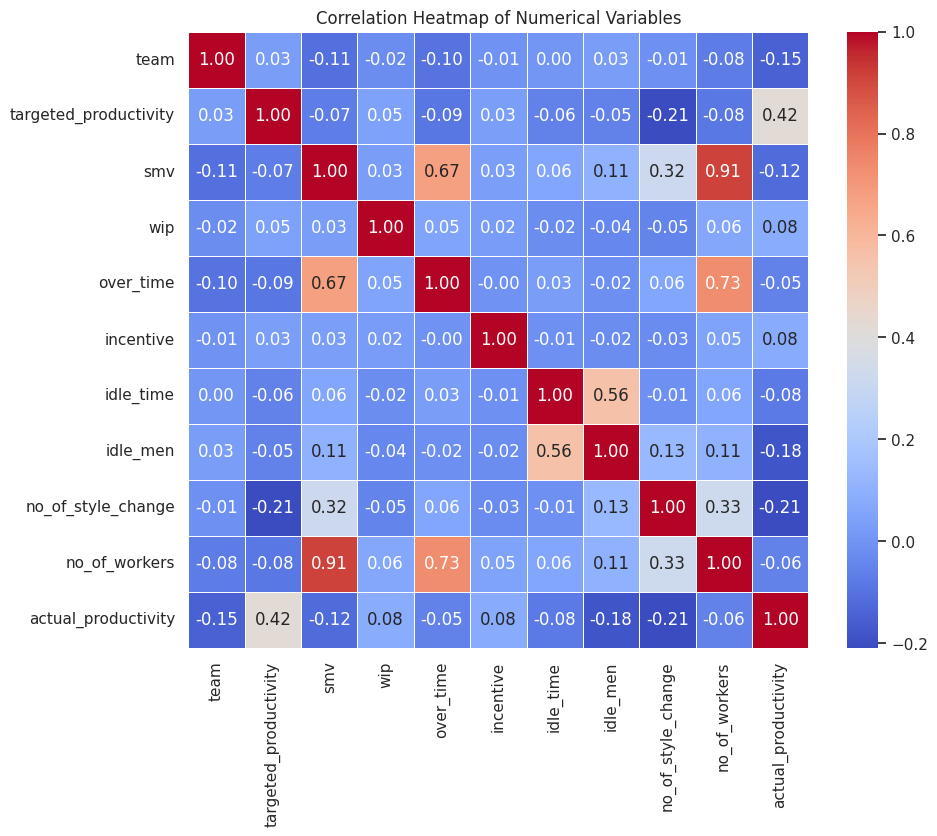

In [16]:
# 8) Correlation Heatmap of Numerical Features
num_cols = df.select_dtypes(include=['float64','int64']).columns
if len(num_cols) > 1:
    plt.figure(figsize=(10,8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap of Numerical Variables")
    plt.show()

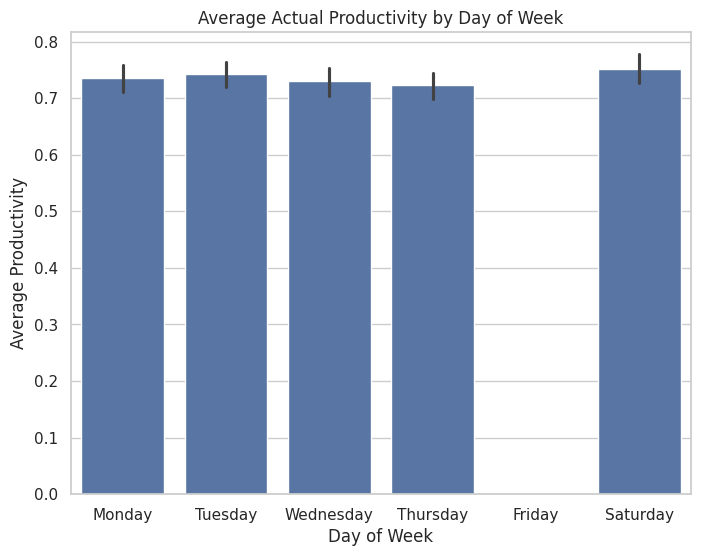

In [17]:
# 9) Average Productivity by Day of Week
if has('day_of_week') and has('actual_productivity'):
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x='day_of_week', y='actual_productivity',
                order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
    plt.title("Average Actual Productivity by Day of Week")
    plt.xlabel("Day of Week")
    plt.ylabel("Average Productivity")
    plt.show()

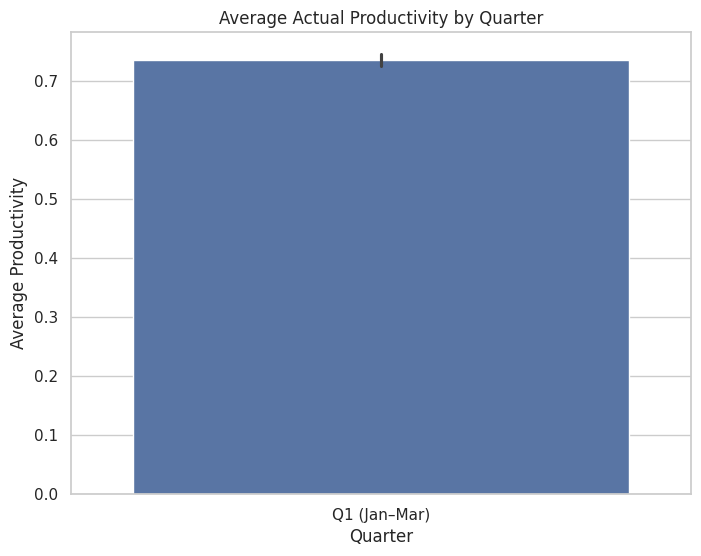

In [18]:
# 10) Average Productivity by Quarter
if has('quarter_label') and has('actual_productivity'):
    plt.figure(figsize=(8,6))
    sns.barplot(data=df, x='quarter_label', y='actual_productivity')
    plt.title("Average Actual Productivity by Quarter")
    plt.xlabel("Quarter")
    plt.ylabel("Average Productivity")
    plt.show()

# Task 4: Insights & Conclusion

### Key Insights

1. **Target vs Actual Productivity Gap**  
   The scatterplot shows that actual productivity often falls below the targeted values.  
   This indicates challenges in meeting management goals, possibly due to absenteeism, idle time, or inefficiencies.

2. **Departmental Differences**  
   The boxplot reveals that the *sewing department* has higher variability in productivity compared to *finishing*.  
   This suggests that sewing operations are more prone to fluctuations in efficiency.

3. **Impact of Incentives**  
   The regression analysis shows a positive correlation between incentives and actual productivity.  
   Workers tend to perform better when financial or motivational incentives are present, but beyond a point, the effect plateaus.

4. **Workforce Attendance & Time Factors**  
   The day-of-week barplot indicates that mid-week (Tuesday–Thursday) has higher productivity compared to weekends.  
   This highlights how attendance and fatigue cycles affect performance.

5. **Quarterly Trends & Seasonality**  
   The quarter-wise analysis shows productivity varies across quarters.  
   Certain quarters (e.g., Q2 and Q3) perform better, possibly due to seasonal demand and worker availability.

---

### Conclusion

This project analyzed the **Productivity Prediction of Garment Employees** dataset from the UCI Repository using HR analytics.  
Through data cleaning, preprocessing, and exploratory data analysis, several insights were derived:

- Productivity goals are not consistently met.  
- Departmental and time-based variations exist in performance.  
- Incentives and balanced overtime positively influence worker output.  
- Workforce planning and scheduling can significantly improve efficiency.  

**Final Takeaway:**  
By leveraging HR analytics, management can identify patterns in workforce productivity, optimize team allocation, and design fair incentive systems.  
This ensures not only higher efficiency but also better employee well-being, aligning with the goals of sustainable HR management.

# Final Summary & Recommendations

### Summary
This project explored the **Productivity Prediction of Garment Employees** dataset (UCI Repository) with 1,197 records and 15 features, focusing on the HR domain.  
Key steps included data cleaning, preprocessing (handling missing values, duplicates, feature engineering), exploratory data analysis (10+ plots), and generating actionable insights.  

The analysis revealed:
- Actual productivity frequently falls short of targeted goals.  
- Departments vary in productivity, with *sewing* showing more fluctuations than *finishing*.  
- Incentives and moderate overtime improve productivity, but excessive overtime may reduce efficiency.  
- Productivity is higher mid-week, while weekends see lower efficiency.  
- Quarter-wise and seasonal trends influence performance levels.  

### Recommendations
1. **Realistic Target Setting**  
   Adjust productivity targets using historical data to ensure goals are achievable and motivating.  

2. **Departmental Focus**  
   Provide additional training and supervision in departments with high variability (e.g., sewing).  

3. **Optimized Incentive Programs**  
   Maintain incentive schemes that balance motivation with cost, avoiding diminishing returns.  

4. **Workforce Scheduling**  
   Reduce fatigue by optimizing work distribution across days, ensuring sufficient rest and balanced overtime.  

5. **Seasonal Planning**  
   Prepare for seasonal dips by adjusting workforce allocation, introducing flexible shifts, or leveraging temporary staff.  

---

### Closing Note
This HR analytics project demonstrates how data-driven approaches can improve both **organizational efficiency** and **employee well-being**. By acting on these recommendations, managers can foster a more productive, sustainable, and motivated workforce.